In [1]:
%run chrome_dino_game_env.ipynb
%run ppo_agent.ipynb
%run dqn_agent.ipynb

pygame 2.1.0 (SDL 2.0.16, Python 3.7.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# dqn/ddqn hyperparameters
gamma = 0.99
epsilon = 1.0
epsilon_dec = 0.996
epsilon_end = 0.01
alpha = 0.0025
batch_size = 64
mem_size = 100000

# ppo hyperparameters
n_epochs = 30
N = 30
policy_clip = 0.2
gae_lambda = 0.95

# training time
n_games = 200

In [3]:
env = ChromeDinoEnv()
env = FlattenObservation(env)
dqn_agent = DQNAgent(gamma=gamma, epsilon=epsilon, alpha=alpha, input_dims=env.observation_space.shape[0], n_actions=env.action_space.n, mem_size=mem_size, batch_size=batch_size, epsilon_dec=epsilon_dec, epsilon_end=epsilon_end)
ddqn_agent = DDQNAgent(gamma=gamma, epsilon=epsilon, alpha=alpha, input_dims=env.observation_space.shape[0], n_actions=env.action_space.n, mem_size=mem_size, batch_size=batch_size, epsilon_dec=epsilon_dec, epsilon_end=epsilon_end)
ppo_agent = PPOAgent(n_actions=env.action_space.n, gamma=gamma, batch_size=batch_size, alpha=alpha, gae_lambda=gae_lambda, policy_clip=policy_clip, n_epochs=n_epochs, input_dims=env.observation_space.shape)

2022-09-28 18:45:31.813971: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
agents = {'dqn':dqn_agent, 'ddqn':ddqn_agent, 'ppo':ppo_agent}
scores = {'dqn':[], 'ddqn':[], 'ppo':[]}
epsilons = {'dqn':[], 'ddqn':[]}

In [5]:
def train_agent(model):
    # method for training the agents
    best_score = env.reward_range[0]
    agent = agents[model]
    n_steps = 0
    for i in range(n_games):
        done = False
        score = 0
        observation = env.reset()
        while not done:
            if model == 'ppo':
                action, prob, val = agent.choose_action(observation)
            else:
                action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            n_steps += 1
            score += reward
            if model == 'ppo':
                agent.store_transition(observation, action, prob, val, reward, done)
                if n_steps % N == 0:
                    agent.learn()
            else:
                agent.remember(observation, action, reward, observation_, done)
                agent.learn()
            observation = observation_

        
        if not model == 'ppo':
            epsilons[model].append(agent.epsilon)
        scores[model].append(score)
            
        avg_score = np.mean(scores[model][max(0, i-100):(i+1)])
        
        if avg_score > best_score:
            best_score = avg_score
            agent.save_model()
        print('algorithm ', model, 'episode ', i, 'score %.2f' % score, 'average score %.2f' % avg_score)

In [6]:
if __name__ == '__main__':
    for model in ['dqn', 'ddqn', 'ppo']:
        train_agent(model)

INFO:tensorflow:Assets written to: models/dqn/assets
algorithm  dqn episode  0 score 116.00 average score 116.00
algorithm  dqn episode  1 score 91.00 average score 103.50
algorithm  dqn episode  2 score 89.00 average score 98.67
algorithm  dqn episode  3 score 89.00 average score 96.25
algorithm  dqn episode  4 score 91.00 average score 95.20
algorithm  dqn episode  5 score 86.00 average score 93.67
algorithm  dqn episode  6 score 132.00 average score 99.14
algorithm  dqn episode  7 score 144.00 average score 104.75
algorithm  dqn episode  8 score 108.00 average score 105.11
algorithm  dqn episode  9 score 118.00 average score 106.40
algorithm  dqn episode  10 score 90.00 average score 104.91
algorithm  dqn episode  11 score 128.00 average score 106.83
algorithm  dqn episode  12 score 91.00 average score 105.62
algorithm  dqn episode  13 score 140.00 average score 108.07
algorithm  dqn episode  14 score 151.00 average score 110.93
algorithm  dqn episode  15 score 135.00 average score 

algorithm  dqn episode  131 score 185.00 average score 122.78
algorithm  dqn episode  132 score 136.00 average score 122.78
algorithm  dqn episode  133 score 81.00 average score 122.73
algorithm  dqn episode  134 score 88.00 average score 122.21
algorithm  dqn episode  135 score 98.00 average score 121.80
algorithm  dqn episode  136 score 83.00 average score 121.07
algorithm  dqn episode  137 score 89.00 average score 120.53
algorithm  dqn episode  138 score 88.00 average score 120.18
algorithm  dqn episode  139 score 102.00 average score 119.39
algorithm  dqn episode  140 score 82.00 average score 119.26
algorithm  dqn episode  141 score 81.00 average score 118.78
algorithm  dqn episode  142 score 146.00 average score 116.32
algorithm  dqn episode  143 score 184.00 average score 117.32
algorithm  dqn episode  144 score 76.00 average score 116.68
algorithm  dqn episode  145 score 173.00 average score 117.34
algorithm  dqn episode  146 score 373.00 average score 120.22
algorithm  dqn ep

algorithm  ddqn episode  63 score 106.00 average score 112.02
algorithm  ddqn episode  64 score 90.00 average score 111.68
algorithm  ddqn episode  65 score 149.00 average score 112.24
algorithm  ddqn episode  66 score 89.00 average score 111.90
algorithm  ddqn episode  67 score 289.00 average score 114.50
algorithm  ddqn episode  68 score 86.00 average score 114.09
algorithm  ddqn episode  69 score 111.00 average score 114.04
algorithm  ddqn episode  70 score 85.00 average score 113.63
algorithm  ddqn episode  71 score 279.00 average score 115.93
algorithm  ddqn episode  72 score 115.00 average score 115.92
algorithm  ddqn episode  73 score 141.00 average score 116.26
algorithm  ddqn episode  74 score 82.00 average score 115.80
algorithm  ddqn episode  75 score 80.00 average score 115.33
algorithm  ddqn episode  76 score 83.00 average score 114.91
algorithm  ddqn episode  77 score 86.00 average score 114.54
algorithm  ddqn episode  78 score 93.00 average score 114.27
algorithm  ddqn e

algorithm  ddqn episode  195 score 88.00 average score 113.87
algorithm  ddqn episode  196 score 90.00 average score 113.88
algorithm  ddqn episode  197 score 141.00 average score 114.07
algorithm  ddqn episode  198 score 109.00 average score 114.35
algorithm  ddqn episode  199 score 72.00 average score 114.25
INFO:tensorflow:Assets written to: models/ppo/actor/assets
INFO:tensorflow:Assets written to: models/ppo/critic/assets
algorithm  ppo episode  0 score 89.00 average score 89.00
INFO:tensorflow:Assets written to: models/ppo/actor/assets
INFO:tensorflow:Assets written to: models/ppo/critic/assets
algorithm  ppo episode  1 score 91.00 average score 90.00
algorithm  ppo episode  2 score 90.00 average score 90.00
algorithm  ppo episode  3 score 83.00 average score 88.25
INFO:tensorflow:Assets written to: models/ppo/actor/assets
INFO:tensorflow:Assets written to: models/ppo/critic/assets
algorithm  ppo episode  4 score 183.00 average score 107.20
algorithm  ppo episode  5 score 92.00 a

algorithm  ppo episode  117 score 85.00 average score 110.73
algorithm  ppo episode  118 score 134.00 average score 111.10
algorithm  ppo episode  119 score 127.00 average score 111.43
algorithm  ppo episode  120 score 92.00 average score 111.44
algorithm  ppo episode  121 score 105.00 average score 111.53
algorithm  ppo episode  122 score 94.00 average score 111.29
algorithm  ppo episode  123 score 146.00 average score 111.40
algorithm  ppo episode  124 score 86.00 average score 111.28
algorithm  ppo episode  125 score 147.00 average score 111.84
algorithm  ppo episode  126 score 95.00 average score 111.75
algorithm  ppo episode  127 score 72.00 average score 111.55
algorithm  ppo episode  128 score 122.00 average score 111.89
algorithm  ppo episode  129 score 123.00 average score 112.21
algorithm  ppo episode  130 score 84.00 average score 111.59
algorithm  ppo episode  131 score 99.00 average score 111.63
algorithm  ppo episode  132 score 83.00 average score 111.08
algorithm  ppo ep

In [7]:
def smooth(scalars, weight): 
    last = scalars[0] 
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  
        smoothed.append(smoothed_val)                        
        last = smoothed_val                                
    return smoothed

In [13]:
def visualize_training(scores):
    fig, ax = plt.subplots(1,len(scores), figsize=(15,5))
    for a, key in zip(ax, scores.keys()):
        y = scores[key]
        n = len(y)
        x = np.linspace(1, n, n)
        a.plot(x, y, label='train')
        a.plot(x, smooth(y, .9), label='smooth train')
        a.set_xlabel('Timestep)')
        a.set_ylabel('Reward')
        a.set_title(key)
        a.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

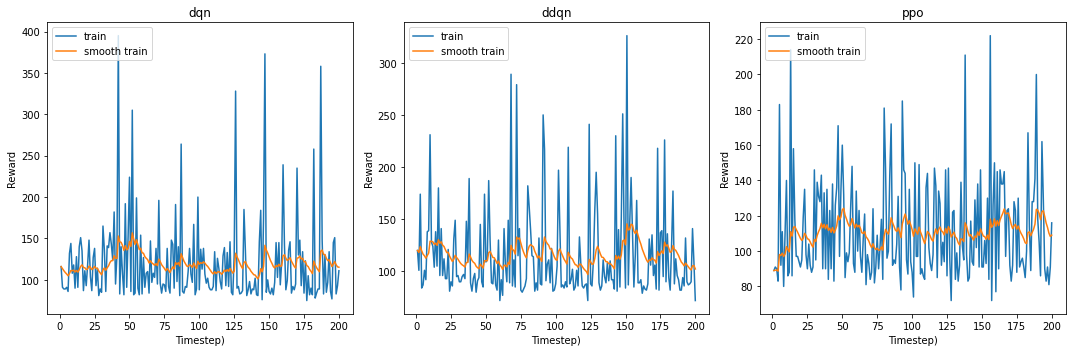

In [16]:
visualize_training(scores)

In [101]:
def showcase(model):
    agent = agents[model]
    # load the best model in training
    agent.load_model
    new_env = ChromeDinoEnv(render_mode='human')
    new_env = FlattenObservation(new_env)
    done = False
    observation = new_env.reset()
    while not done:
        if model == 'ppo':
            action, prob, val = agent.choose_action(observation)
        else:
            action = agent.choose_action(observation)
        observation_, reward, done, info = new_env.step(action)
        observation = observation_
    new_env.close()

In [104]:
for model in ['dqn', 'ddqn', 'ppo']:
    showcase(model)

In [ ]:
from gym.utils.play import play
mapping = {(pg.K_UP,):1, (pg.K_DOWN,):2}
#play(ChromeDinoEnv(), keys_to_action=mapping)